# Prever o preço da venda de um Imóvel

[Especificação do Projeto](https://github.com/AndersonAlencarBarros/IC/blob/main/Prever%20o%20pre%C3%A7o%20da%20venda%20de%20um%20Im%C3%B3vel/Bases/Especificacao.pdf)  
[Descrição da base de dados](https://github.com/AndersonAlencarBarros/IC/blob/main/Prever%20o%20pre%C3%A7o%20da%20venda%20de%20um%20Im%C3%B3vel/Bases/Descri%C3%A7%C3%A3o%20da%20Base.txt)

### **Bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
from google.colab import files

%matplotlib inline

### **Importação das bases de treinamento e teste**

In [ ]:
ic_house_pred_test_url = 'https://raw.githubusercontent.com/AndersonAlencarBarros/IC/main/Prever%20o%20pre%C3%A7o%20da%20venda%20de%20um%20Im%C3%B3vel/Bases/ic_house_pred_test.csv'
ic_house_pred_train_url = 'https://raw.githubusercontent.com/AndersonAlencarBarros/IC/main/Prever%20o%20pre%C3%A7o%20da%20venda%20de%20um%20Im%C3%B3vel/Bases/ic_house_pred_train.csv'

ic_house_pred_test = pd.read_csv(ic_house_pred_test_url)
ic_house_pred_train = pd.read_csv(ic_house_pred_train_url)

In [ ]:
ic_house_pred_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,136,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,7,6,1970,1970,Hip,CompShg,Plywood,Plywood,BrkFace,288.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,1304,1304,GasA,...,Y,SBrkr,1682,0,0,1682,0,0,2,0,3,1,TA,7,Typ,1,Gd,Attchd,1970.0,Unf,2,530,TA,TA,Y,98,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,174000
1,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,80.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,...,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2,525,TA,TA,Y,0,28,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
2,763,60,FV,72.0,8640,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2009,2009,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,Mn,GLQ,24,Unf,0,732,756,GasA,...,Y,SBrkr,764,783,0,1547,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2009.0,Unf,2,614,TA,TA,Y,169,45,0,0,0,0,NaN,NaN,NaN,0,6,2010,Con,Normal,215200
3,933,20,RL,84.0,11670,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Somerst,RRNn,Norm,1Fam,1Story,9,5,2006,2006,Hip,CompShg,VinylSd,ImStucc,Stone,302.0,Ex,TA,PConc,Ex,Gd,No,Unf,0,Unf,0,1905,1905,GasA,...,Y,SBrkr,1905,0,0,1905,0,0,2,0,3,1,Ex,8,Typ,1,Gd,Attchd,2006.0,Fin,3,788,TA,TA,Y,0,191,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,320000
4,436,60,RL,43.0,10667,Pave,NaN,IR2,Lvl,AllPub,CulDSac,Gtl,CollgCr,PosN,Norm,1Fam,2Story,7,6,1996,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,385,ALQ,344,70,799,GasA,...,Y,SBrkr,827,834,0,1661,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,1996.0,RFn,2,550,TA,TA,Y,158,61,0,0,0,0,NaN,NaN,NaN,0,4,2009,ConLw,Normal,212000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,1096,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,6,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,24,Unf,0,1290,1314,GasA,...,Y,SBrkr,1314,0,0,1314,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,RFn,2,440,TA,TA,Y,0,22,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,176432
1018,1131,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,4,3,1928,1950,Gable,CompShg,WdShing,Plywood,None,0.0,TA,TA,BrkTil,TA,TA,No,BLQ,622,Unf,0,500,1122,GasA,...,Y,SBrkr,1328,653,0,1981,1,0,2,0,4,1,Gd,7,Min2,2,TA,Detchd,1981.0,Unf,2,576,TA,TA,Y,431,44,0,0,0,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal,135000
1019,1295,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1955,1990,Hip,CompShg,WdShing,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,167,Unf,0,697,864,GasA,...,Y,SBrkr,864,0,0,864,1,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1957.0,Unf,2,572,TA,TA,N,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,115000
1020,861,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,7,8,1918,1998,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,912,912,GasA,...

In [ ]:
ic_house_pred_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,893,20,RL,70.0,8414,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,6,8,1963,2003,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,663,Unf,0,396,1059,GasA,...,Y,SBrkr,1068,0,0,1068,0,1,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1963.0,RFn,1,264,TA,TA,Y,192,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal,154500
1,1106,60,RL,98.0,12256,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1994,1995,Gable,CompShg,HdBoard,HdBoard,BrkFace,362.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1032,Unf,0,431,1463,GasA,...,Y,SBrkr,1500,1122,0,2622,1,0,2,1,3,1,Gd,9,Typ,2,TA,Attchd,1994.0,RFn,2,712,TA,TA,Y,186,32,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,325000
2,414,30,RM,56.0,8960,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,6,1927,1950,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1008,1008,GasA,...,Y,FuseA,1028,0,0,1028,0,0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1927.0,Unf,2,360,TA,TA,Y,0,0,130,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,115000
3,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,1004,GasA,...,Y,SBrkr,1004,660,0,1664,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,24,36,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal,159000
4,1037,20,RL,89.0,12898,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,9,5,2007,2008,Hip,CompShg,VinylSd,VinylSd,Stone,70.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1022,Unf,0,598,1620,GasA,...,Y,SBrkr,1620,0,0,1620,1,0,2,0,2,1,Ex,6,Typ,1,Ex,Attchd,2008.0,Fin,3,912,TA,TA,Y,228,0,0,0,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal,315500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,332,20,RL,70.0,8176,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1958,1992,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,846,Unf,0,210,1056,GasA,...,Y,SBrkr,1056,0,0,1056,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1958.0,RFn,1,308,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,139000
434,324,20,RM,49.0,5820,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,3,8,1955,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,256,Unf,0,906,1162,GasA,...,Y,SBrkr,1163,0,0,1163,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1955.0,Unf,1,220,Fa,TA,Y,142,98,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,126175
435,651,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,...,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
436,440,50,RL,67.0,12354,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,6,8,1920,2000,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,Fa,Mn,Unf,0,Unf,0,684,684,GasA,...,Y

### **Pré Processamento e Transformação**

In [ ]:
class PreProcess:
    def __init__(self, data):
        self.data = data
    
    def change_dtype(self):
      self.data[to_float] = self.data[to_float].apply(pd.to_numeric, errors='coerce', downcast='float')
      self.data[to_int] = self.data[to_int].apply(pd.to_numeric, errors='coerce', downcast='float')
 
    def missing_values_treatment(self):
      for i in self.data.isna().sum()[self.data.isnull().any()].index.tolist():
        self.data[i].fillna(self.data[i].mean(), inplace = True)

    def dropColumn(self, column):
      self.data.drop(column, inplace=True, axis=1)

    def createColumn(self, column):
      self.data[column] = 0

    def returnMissingValuesCount(self):
      return self.data.isna().sum()[self.data.isnull().any()].index.tolist()

    def create_dummies_variables(self):
      self.data = pd.get_dummies(self.data, prefix_sep = '_ ', drop_first = True)

    def normalize(self, train, test):
      scaler = MinMaxScaler()

      train_norm = scaler.fit_transform(train)
      test_norm = scaler.transform(test)

      x_train_norm_df = pd.DataFrame(train_norm, columns=train.columns)
      x_test_norm_df = pd.DataFrame(test_norm, columns=test.columns)

      return x_train_norm_df, x_test_norm_df

In [ ]:
# Função para salvar os arquivos

def download_file(data, name_file):
  data.to_csv(name_file, index = False)
  files.download(name_file)

#### Instanciação das Classes

In [ ]:
HousePredTrainClass = PreProcess(ic_house_pred_train)
HousePredTestClass = PreProcess(ic_house_pred_test)

#### Remover coluna Id

In [ ]:
HousePredTrainClass.dropColumn('Id')
HousePredTestClass.dropColumn('Id')

#### Criar Variáveis Dummies

In [ ]:
HousePredTrainClass.create_dummies_variables()
HousePredTestClass.create_dummies_variables()

In [ ]:
HousePredTestClass.data.shape

(438, 217)

In [ ]:
HousePredTrainClass.data.shape

(1022, 241)

#### Adicionando as colunas que estão na base de treinamento e que não estão no teste na base teste

In [ ]:
difference_list  = HousePredTrainClass.data.columns.difference(HousePredTestClass.data.columns)

for column in difference_list:
  HousePredTestClass.createColumn(column)

#### Adicionando as colunas que estão na base de teste e que não estão no treinamento na base treinamento

In [ ]:
difference_list = HousePredTestClass.data.columns.difference(HousePredTrainClass.data.columns)

for column in difference_list:
  HousePredTrainClass.createColumn(column)

In [ ]:
HousePredTrainClass.data.shape

(1022, 246)

In [ ]:
HousePredTestClass.data.shape

(438, 246)

#### Tratamento de Missing Values pelo valor da Média

In [ ]:
HousePredTrainClass.missing_values_treatment()
HousePredTestClass.missing_values_treatment()

#### Separar variável alvo

In [ ]:
SalePrice_Test = HousePredTestClass.data['SalePrice']
SalePrice_Train = HousePredTrainClass.data['SalePrice']

HousePredTestClass.dropColumn('SalePrice')
HousePredTrainClass.dropColumn('SalePrice')

#### Nomalizar Bases

In [ ]:
HousePredTrainClass.data, HousePredTestClass.data = HousePredTrainClass.normalize(HousePredTrainClass.data, HousePredTestClass.data)

#### Variável Alvo em Log

In [ ]:
SalePrice_Test_log = np.log1p(SalePrice_Test)
SalePrice_Train_log = np.log1p(SalePrice_Train)

#### Salvando bases de dados

In [ ]:
# Variáveis Alvo Original
download_file(SalePrice_Test, 'SalePrice_Test_norm.csv')
download_file(SalePrice_Train, 'SalePrice_Train_norm.csv')

# Variáveis Alvo em Log
download_file(SalePrice_Test_log, 'SalePrice_Test_log_norm.csv')
download_file(SalePrice_Train_log, 'SalePrice_Train_log_norm.csv')

# Base de Treinamneto
download_file(HousePredTrainClass.data, 'HousePred_Train.csv')

# Base de Test
download_file(HousePredTestClass.data, 'HousePred_Test.csv')

(array([  3.,   8.,  35., 125., 316., 289., 167.,  63.,  12.,   4.]),
 array([10.46027076, 10.76635777, 11.07244478, 11.37853178, 11.68461879,
        11.9907058 , 12.29679281, 12.60287982, 12.90896682, 13.21505383,
        13.52114084]),
 <a list of 10 Patch objects>)

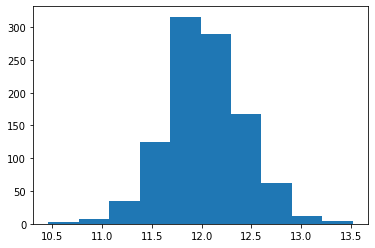

In [ ]:
plt.hist(SalePrice_Train_log)

(array([ 99., 491., 271., 100.,  39.,  14.,   3.,   3.,   1.,   1.]),
 array([ 34900., 105910., 176920., 247930., 318940., 389950., 460960.,
        531970., 602980., 673990., 745000.]),
 <a list of 10 Patch objects>)

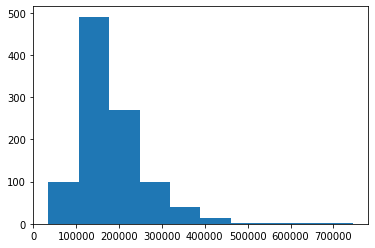

In [ ]:
plt.hist(SalePrice_Train)